In [16]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Arreglo que contiene 7 entradas de grados Celsius
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype = float)

# Arreglo que contiene los resultados en Fahrenheit
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype = float)

In [10]:
'''Creamos una capa densa. Las capas densas tienen conexiones de todas las neuronas hacia todas las 
neuronas de la siguiente capa.
'''
capa = tf.keras.layers.Dense(units = 1, input_shape = [1])

'''
Con units le especificamos las neuronas y con input_shape le indicamos que solo tenemos una neurona de
entrada(esto nos autoregistra la capa de entrada con una neurona).
'''

modelo = tf.keras.Sequential([capa]) # Creamos el modelo

In [14]:
'''
Vamos a decirle al modelo algunas propiedades de como tiene que procesar los calculos matemáticos.
Esto es para que pueda aprender mejor.

Adam le permite a la red saber cómo ajustar los pesos y sesgos para que aprenda y NO desaprenda.
Con el 0.1 le estamos diciendo que tanto ajustar los pesos y sesgos. Es mejor usar números chicos
para que vaya ajustando poco a poco, caso contrario, puede pasarse del número esperado y tal vez no
llegue a la mejor opción.

mean_squared_error considera que una poca cantidad de errores grandes es peor que una gran cantidad
de errores pequeños.
'''
modelo.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [17]:
print('Entrenando el modelo...')
entrenando = modelo.fit(celsius, fahrenheit, epochs = 1000, verbose = False) # Verbose no muestra los textos del entrenamiento
print('¡Modelo entrenado!')

Entrenando el modelo...
¡Modelo entrenado!


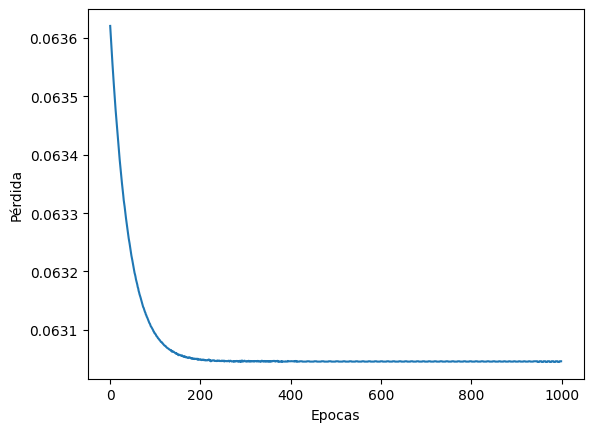

In [19]:
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.plot(entrenando.history['loss'])

In [22]:
# Hacemos una predicción.
print('----- Haciendo predicción -----')
prediccion = modelo.predict([100.0])
print('El resultado es:', prediccion, 'Fahrenheit')

----- Haciendo predicción -----


1/1 [==============================] - 0s 394ms/step
El resultado es: [[211.74744]] Fahrenheit


In [23]:
print('Variables internas del modelo:')
print(capa.get_weights())

Variables internas del modelo:
[array([[1.7979496]], dtype=float32), array([31.95248], dtype=float32)]


La primer capa multiplica la entrada por 1.79 y la salida suma 31.9 al resultado de esa multiplicación.

### Agreguemos más capas y más neuronas.

In [25]:
capa2 = tf.keras.layers.Dense(units = 3, input_shape = [1])
capa3 = tf.keras.layers.Dense(units = 3)
salida = tf.keras.layers.Dense(units = 1)
modelo2 = tf.keras.Sequential([capa2, capa3, salida])

In [26]:
modelo2.compile(
    optimizer = tf.keras.optimizers.Adam(0.1),
    loss = 'mean_squared_error'
)

In [27]:
print('Entrenando el modelo...')
entrenando2 = modelo2.fit(celsius, fahrenheit, epochs = 1000, verbose = False) # Verbose no muestra los textos del entrenamiento
print('¡Modelo entrenado!')

Entrenando el modelo...
¡Modelo entrenado!


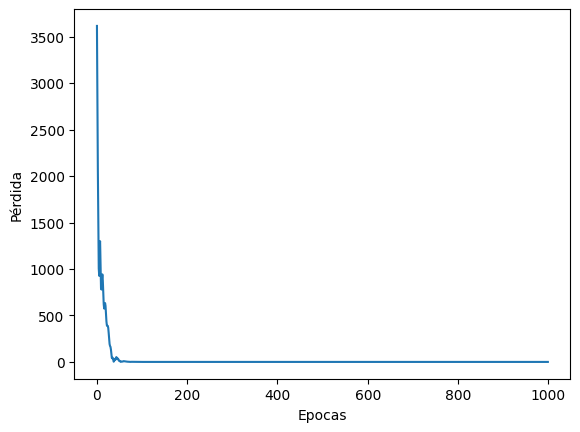

In [28]:
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.plot(entrenando2.history['loss'])

In [29]:
# Hacemos una predicción.
print('----- Haciendo predicción -----')
prediccion = modelo2.predict([100.0])
print('El resultado es:', prediccion, 'Fahrenheit')

----- Haciendo predicción -----
1/1 [==============================] - 0s 232ms/step
El resultado es: [[211.74744]] Fahrenheit


In [30]:
print('Variables internas del modelo:')
print(capa2.get_weights())
print(capa3.get_weights())
print(salida.get_weights())

Variables internas del modelo:
[array([[-0.37896615,  0.8379991 ,  0.47923028]], dtype=float32), array([2.711316, 3.505972, 3.693708], dtype=float32)]
[array([[-0.6294907 , -0.29970214,  1.5912942 ],
       [-1.483095  , -0.21138999,  0.84103215],
       [-1.1820107 , -1.5447378 , -0.2500772 ]], dtype=float32), array([-3.9625626, -2.1880672,  3.6912334], dtype=float32)]
[array([[-0.97055084],
       [-0.36317527],
       [ 1.0198077 ]], dtype=float32), array([3.5057094], dtype=float32)]
